In [1]:
# Lets work on the dataset of churn model to extract a vital information from it.
# Lets make so simple code that can be easily understandable.
# Lets discuss in details while working on the dataset

### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline


### Importing the data

In [3]:
df= pd.read_csv(r'C:\Users\pcs\Desktop\Data science\DS Projects on Python\INSAID@internship\Churn.csv')
df.head()  # for first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# We could not see the entire columns of the data
#Lets use df.iloc[] to go through the entire columns

df1=df.iloc[:,0:11].head()
df2=df.iloc[:,12:21].head()
df1.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No


In [5]:
df2.head()

,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Outline

In [6]:
# Shape, info, dtypes, unique
print('Rows and columns:', df.shape)
print('\nChurn info:\n', df.info)
print('\nData types: \n', df.dtypes)
print('\nUnique:\n\n', df.nunique())

Rows and columns: (7043, 21)

Churn info:
 <bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0        

### Data summary


In [7]:
# describe()-- shows us mean, standard deviation, min, max, inter quartile range
df.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
SeniorCitizen,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### Data Manipulation

In [8]:
# First let us find the nulls
df.isna().sum()
#We observed there are no nulls present in the dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# From the above df.iloc[] statements we found that there are few categorical columns.
# Lets go through the columns


In [10]:
print(df['MultipleLines'].value_counts())
print(df['InternetService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


In [11]:
# Observed that these columns contain (Yes, No, No internet connection) 
columns = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in columns:
    print(df[i].value_counts())
    
# Replace No internet service by No as there is no information.
for i in columns : 
    df[i]  = df[i].replace({'No internet service' : 'No'})
df['MultipleLines']=df['MultipleLines'].replace({'No phone service':'No'})


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


In [12]:
#Just checking 
df['OnlineSecurity'].value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [13]:
print(df['Dependents'].value_counts())
print(df['PhoneService'].value_counts()) 


No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64


In [14]:
print(df['SeniorCitizen'].value_counts())


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [15]:
# Observed there are Yes and No's in few columns i.e.,  Dependents, and PhoneService
# Lets replace it by 0, 1
df["Dependents"] = df["Dependents"].replace({'Yes':1,'No':0})
df["PhoneService"] = df["PhoneService"].replace({"Yes":1,"No":0})
df["Partner"] = df["Partner"].replace({"Yes":1,"No":0})
df["gender"] = df["gender"].replace({'Male':1,"Female":0})


In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
# Lets go through the tenure column how long the customers have been registered for the subscription.
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [19]:
df['tenure'].describe().drop('count').T


mean    32.371149
std     24.559481
min      0.000000
25%      9.000000
50%     29.000000
75%     55.000000
max     72.000000
Name: tenure, dtype: float64

In [20]:
# As per the obervation there are 0-72(min-max) tenurity in the tenure column.
# Lets group those tenurity like 0-12,13-24...
# Just like creating bins for tenure column.

def tenure_group(df) :
    
    if df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif df["tenure"] > 60 :
        return "Tenure_gt_60"
df["Tenure_group"] = df.apply(lambda df:tenure_group(df),
                                      axis = 1)

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,7590-VHVEG,0,0,1,0,1,0,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Tenure_24-48
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,1,0,0,0,45,0,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [22]:
df.nunique()[df.nunique()<6]

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
Tenure_group        5
dtype: int64

In [23]:
# Lets seperate numerical and categorical variables
# numeric_data = df.select_dtypes(include=[np.number]) # This method can be followed but few columns have been
# converted to 0,1
# categorical_data = df.select_dtypes(exclude=[np.number])

customer_ID     = ['customerID']
target_column = ["Churn"]
category_column   = df.nunique()[df.nunique() < 6].keys().tolist()
category_column   = [x for x in category_column if x not in target_column]
numerical_column   = [x for x in df.columns if x not in category_column + target_column + customer_ID]

In [24]:
# Lets see what does category_column contain
category_column

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Tenure_group']

In [25]:
# Lets see what does numerical_column contain
numerical_column


['tenure', 'MonthlyCharges', 'TotalCharges']

### Data Visualization

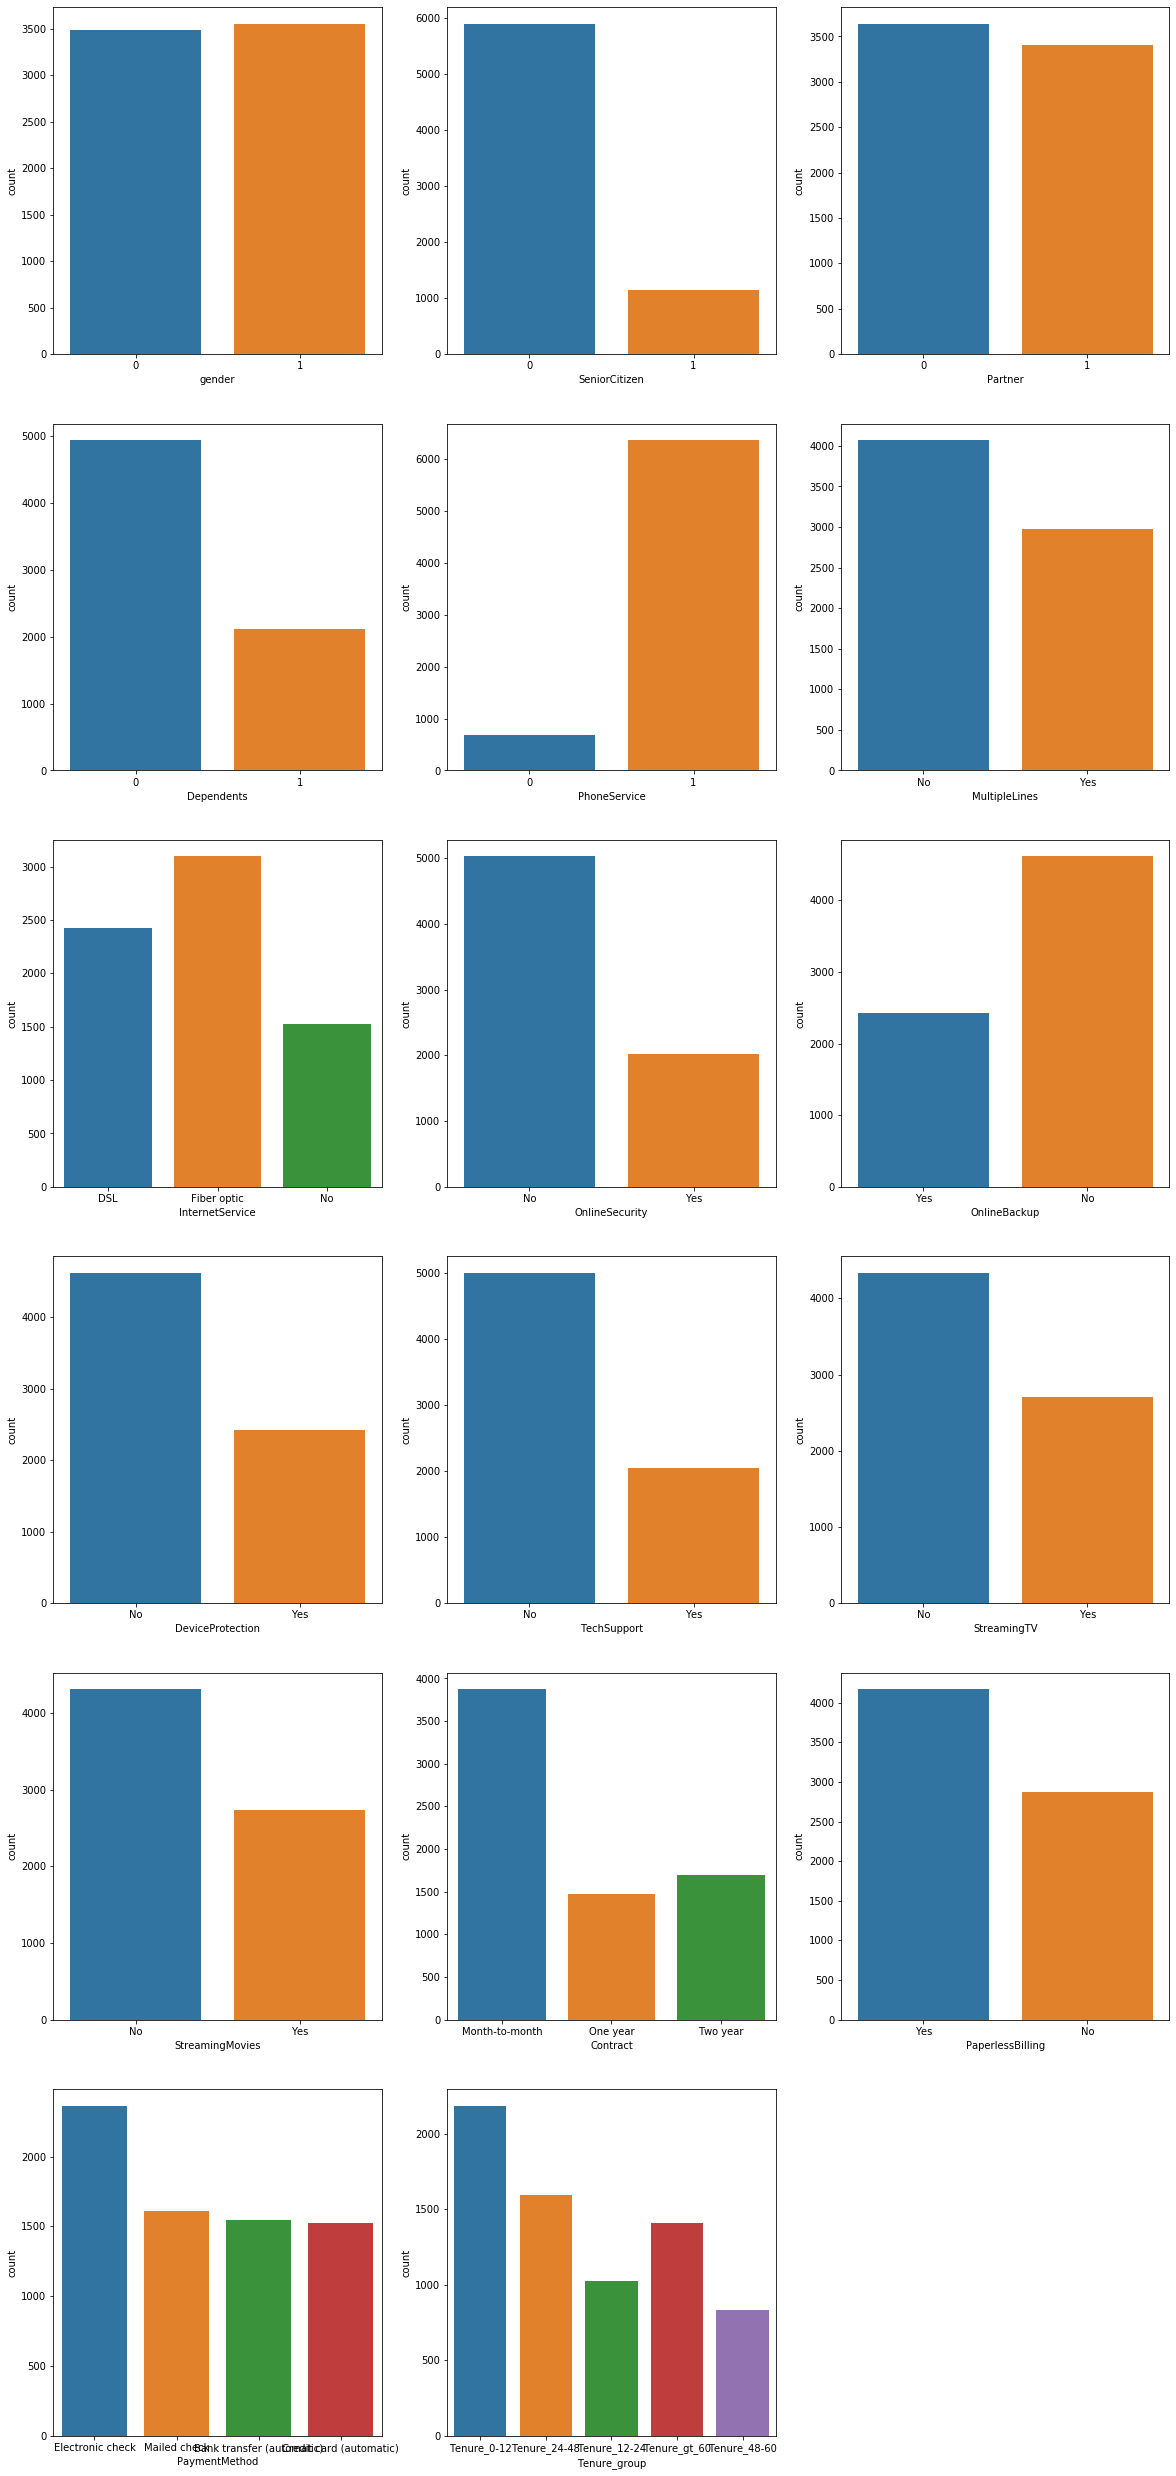

In [26]:
# Lets try a different way to visualize in a simple way
# We have categorical and numerical variable and compare those columns with churn column.
# Data Visualization comes up with matplotlib and seaborn.
# seaborn is a standalone data visualization package that provides many extremely valuable data visualizations in a single package.
# In a nutshell we get lot of information :-)

plt.figure(figsize=(20,60))
for i in range(len(category_column)):
    plt.subplot(8,3,i+1)
    sns.countplot(df[category_column[i]])
    



In [27]:
# Lets make a comparison between these category_column with churn


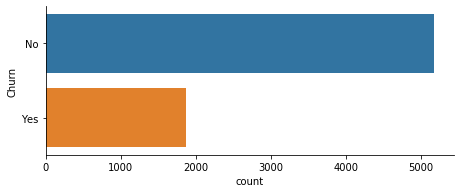

In [28]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

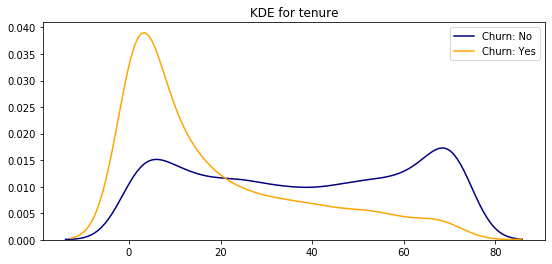

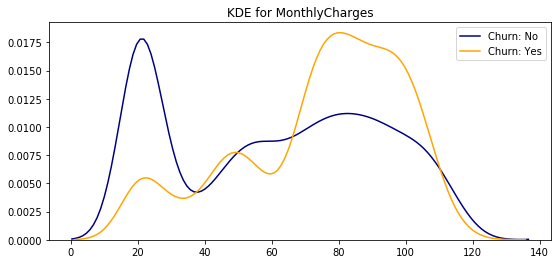

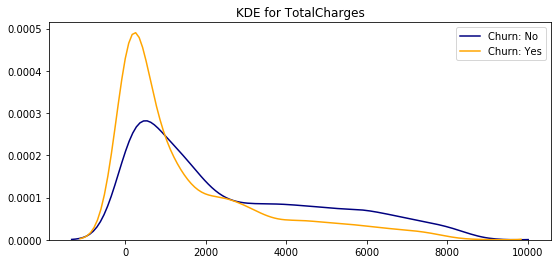

In [29]:
# Lets go compare the Churn with tenurity, MonthlyCharges, TotalCharges by using kde plot.

df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32') ## converted to float as it was string.
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

In [30]:
#From the above plot we observed that
# The clients who have joined recently are churned
# The clients with higher MonthlyCharges are also Churned
# Lastly, Tenure and MonthlyCharges are perhaps played a vital role


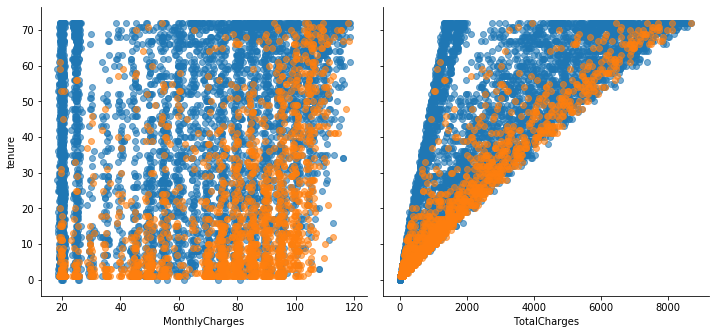

In [31]:
# Lets go through the pairgrid plot

g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

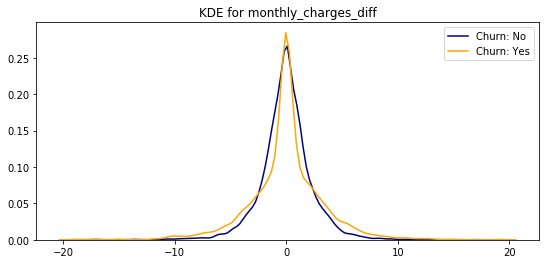

In [32]:
# Lets try another feature we can consider is the difference between the MonthlyCharges and the TotalCharges divided by the tenure.
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

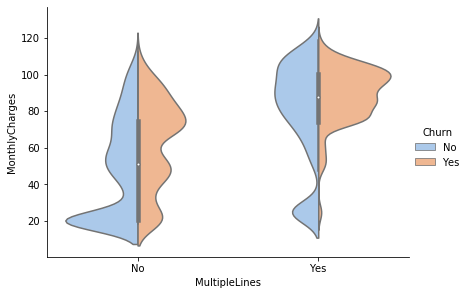

In [33]:
# Lets have glance between MultipleLines, MonthlyCharges and Churn
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

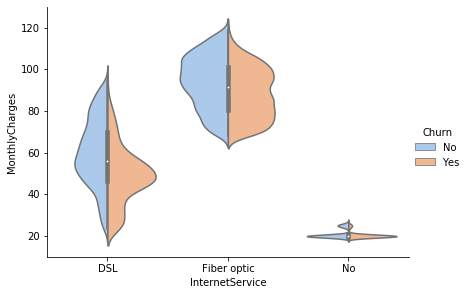

In [34]:
# Lets have glance between InternetService, MonthlyCharges and Churn

ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4);

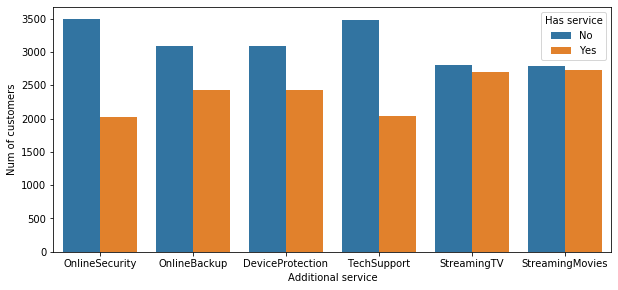

In [35]:
# Going through few category columns whether do they have an influence over churn
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

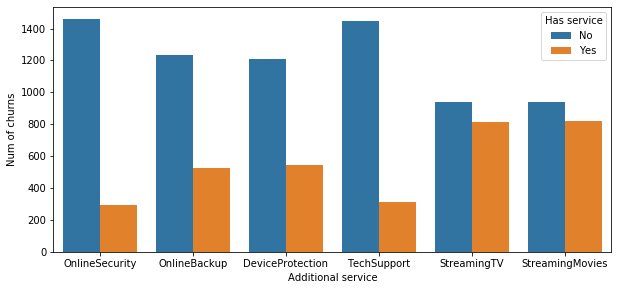

In [36]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

In [37]:
#from the above plots it is observed that the first plot shows the total number of customers for each additional service, 
#while the second shows the number of clients that churn. We can see that:

#Customers with the first 4 additionals (security to tech support) are more unlikely to churn
#Streaming service is not predictive for churn

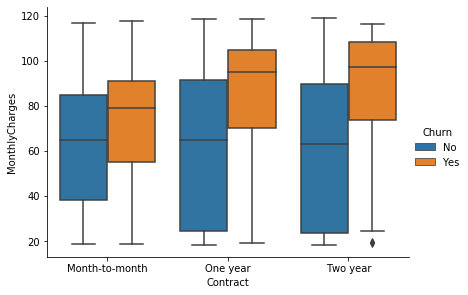

In [38]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

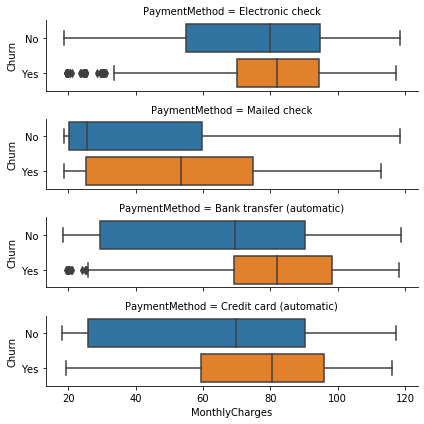

In [39]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')

In [40]:
#Longer contracts are more affected by higher monthly charges (for churn rate).
#Mailed checks have lower charges
#There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check

In [41]:
# Lets go through the Heatmap
df.drop(['customerID', 'total_charges_to_tenure_ratio', 'monthly_charges_diff'],axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()


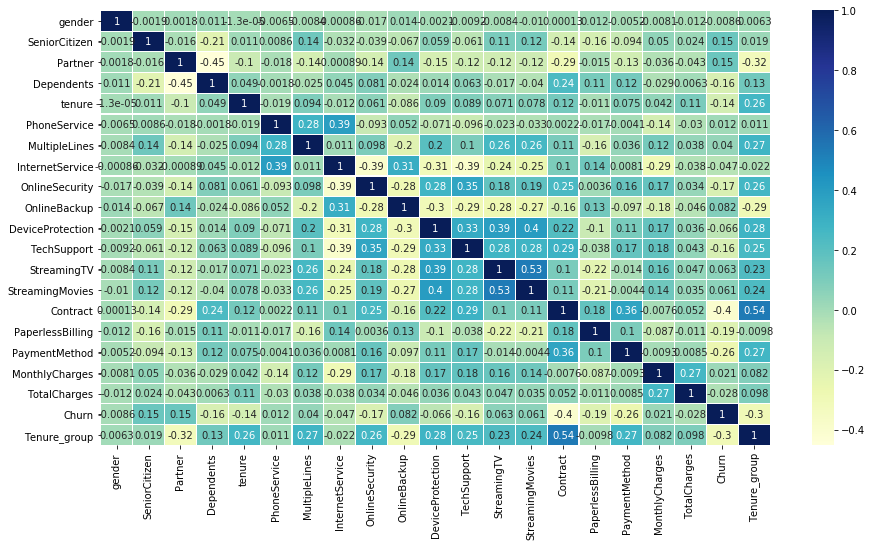

In [42]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,linewidths=.2, cmap="YlGnBu")


In [43]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,0,0,1,0,1,0,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,Tenure_0-12
1,1,0,0,0,34,1,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,No,Tenure_24-48
2,1,0,0,0,2,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,Tenure_0-12
3,1,0,0,0,45,0,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No,Tenure_24-48
4,0,0,0,0,2,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,Tenure_0-12


In [44]:
from sklearn.preprocessing import LabelEncoder                 # Converting categorical churn column into numerical
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [45]:
df = pd.get_dummies(df)                           


In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_Tenure_0-12,Tenure_group_Tenure_12-24,Tenure_group_Tenure_24-48,Tenure_group_Tenure_48-60,Tenure_group_Tenure_gt_60
0,0,0,1,0,1,0,29.85,29.850000,0,1,...,1,0,0,1,0,1,0,0,0,0
1,1,0,0,0,34,1,56.95,1889.500000,0,1,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,53.85,108.150002,1,1,...,1,0,0,0,1,1,0,0,0,0
3,1,0,0,0,45,0,42.30,1840.750000,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,2,1,70.70,151.649994,1,1,...,1,0,0,1,0,1,0,0,0,0


In [47]:
X = df.drop('Churn', axis = 1)                # Defining X and y variables
y = df['Churn']

### Importing required Libraries

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Model building

In [50]:
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_accuracy = round(lr.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', lr_accuracy)

Test Accuracy:  80.12


C:\Users\pcs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_accuracy = round(knn.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', knn_accuracy)

Test Accuracy:  76.76


In [52]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_accuracy = round(svc.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', svc_accuracy)

Test Accuracy:  74.07


In [53]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

dt_accuracy = round(dt.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', dt_accuracy)

Test Accuracy:  79.32


In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_accuracy = round(rf.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', rf_accuracy)

Test Accuracy:  79.18


In [55]:
xgb = XGBClassifier(n_estimators=10)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_accuracy = round(xgb.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', xgb_accuracy)

Test Accuracy:  80.08


In [ ]:
# Super cool got 80.12 and 80.08 accuracy. Zing zing amazing. Models are working pretty good.

###  Pipeline method

In [65]:
# Lets try pipelining method as we have already been through individual model.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
clfs=[]
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())])))

LogReg: 0.800000 (+/- 0.012963)
XGBClassifier: 0.803043 (+/- 0.015245)
KNN: 0.754767 (+/- 0.013860)
DecisionTreeClassifier: 0.720284 (+/- 0.016787)
RandomForestClassifier: 0.782353 (+/- 0.015099)


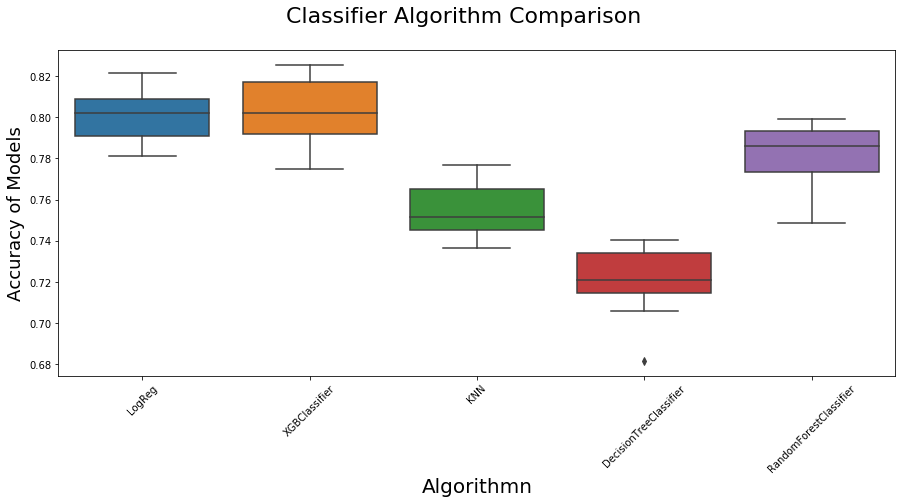

In [68]:
scoring = 'accuracy'
n_folds = 10
results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [69]:
### From the above plot it has been observed that Logistic Regression and XGBClassifier worked perfectly.


In [75]:
# Lets work on small def function to display ROC, AUC curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm, X_train, y_train, 
          X_test, y_test, of_type):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(X_train.values,y_train.values)
    predictions = algorithm.predict(X_test.values)
    
    print ("\naccuracy_score :",accuracy_score(y_test, predictions))
    
    print ("\nclassification report :\n",(classification_report(y_test, predictions)))
        
    plt.figure(figsize=(16,12))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_, X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************


C:\Users\pcs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



accuracy_score : 0.8012304779933743

classification report :
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1565
           1       0.65      0.49      0.56       548

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



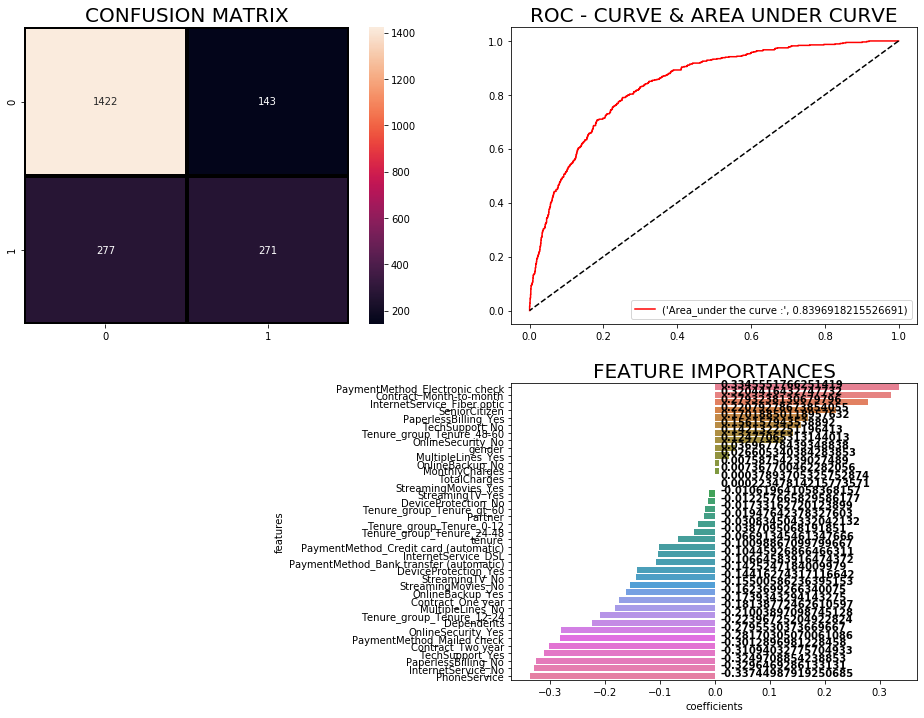

In [76]:
lr =LogisticRegression(solver = "lbfgs", multi_class = "auto")

model(lr,X_train, y_train,
      X_test, y_test, "coef")


accuracy_score : 0.7931850449597728

classification report :
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1565
           1       0.61      0.55      0.58       548

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113



Text(0.5, 1, 'CONFUSION MATRIX')

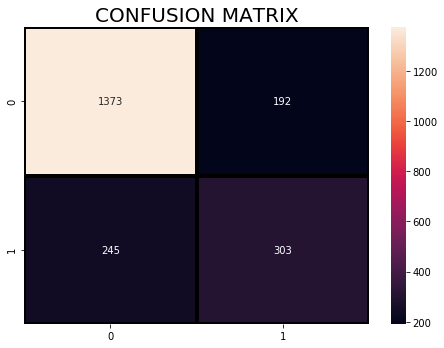

In [78]:
xgb = XGBClassifier(n_estimators=800, n_jobs=-1)

xgb.fit(X_train.values,y_train.values)
predictions = xgb.predict(X_test.values)

print ("\naccuracy_score :",accuracy_score(y_test, predictions))

print ("\nclassification report :\n",(classification_report(y_test, predictions)))

plt.figure(figsize=(17,12))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, predictions),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### Successfully completed the task time didn't permit I tried my level best to implement what i have acquired and experience

### Churn describes the behavior of customers leaving the organization. Churn is the biggest problem for the companies now a days where the companies are providing lot more offers for the subscribers. Consider OTT platforms like Prime, Hotstar, ZEE, and Sony. I missed JIO. JIO would overshadow all the OTT platforms if it comes into the market. Its a live example for the Churn. 



### More customers = More profit


### Make more feasible for the users to be friendly that users should not unsubscribe the platform they use

### I have tried my level best to demonstrate. Thanks for the wonderful opportunity. :-)